<center><h1> Data Mining Final Project  </center></h1>

#### House Sales price ....... 
##### By : Bar Leshem, Yuval Anavim, Shachar Macharez
- Email:    Barlesh8@gmal.com


<a id="top"></a>

### Table of contents: 

- [Introduction: ](#Intro)
- [1. Data : cleaning &  filling blank features: ](#1.)
    - [1.1. N/A](#1.1.)
    - [1.2. Missing cells](#1.2.)
- [2. Linear Regression ](#1.)
    - [1.1. PCA ](#1.1.)
    - [1.2. Linear Models](#1.2.)
- [2. Artificial Neural Network](#2.)
    - [2.1. sub1](#2.1.)
    - [2.2. sub2](#2.2.)    
- [Appendix](#Appendix)

<a id='Intro'></a>

In [1]:
from helper_functions import *
import random

ModuleNotFoundError: No module named 'helper_functions'

## Introduction: 

- After pushing to github, notebooks can be viewed with http://nbviewer.jupyter.org/ . 
- You can see this notebook using nbviewer here: http://nbviewer.jupyter.org/github/kaplann/Blank_jupyter_project/blob/master/Blank_proj.ipynb#TODO:

[back to top](#top)

<a id='#TODO'></a>

## TODO: 

1. Add things to do
1. Do things todo  

[back to top](#top)

# Loading Data

In [2]:
data_path='/home/barlesh/Projects/Data_Mining_Project/data/'
train_file='train.csv'
test_file='test.csv'
#train_file_new='train_new.csv'
#test_file_new='test_new.csv'
result_path='results/'
result_file='res.csv'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import r2_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", data_path]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [4]:
houseprice=pd.read_csv(data_path+test_file)
houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# <a>  1.  Data : Cleaning & filling blank features: </a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
%matplotlib inline

In [6]:
train = pd.read_csv(data_path+train_file)
test = pd.read_csv(data_path+test_file)

In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

# Imputation of missing values

In [8]:
# I have no idea how to do it better. Probably, it is better to do nothing
x = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotArea"]
y = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotFrontage"]
# plt.scatter(x, y)
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t], 1)
all_data.loc[all_data['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, all_data.loc[all_data['LotFrontage'].isnull(), 'LotArea'])

In [9]:
all_data.loc[all_data.Alley.isnull(), 'Alley'] = 'NoAlley'
all_data.loc[all_data.MasVnrType.isnull(), 'MasVnrType'] = 'None' # no good
all_data.loc[all_data.MasVnrType == 'None', 'MasVnrArea'] = 0
all_data.loc[all_data.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
all_data.loc[all_data.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
all_data.loc[all_data.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
all_data.loc[all_data.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
all_data.loc[all_data.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = all_data.BsmtFinSF1.median()
all_data.loc[all_data.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
all_data.loc[all_data.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = all_data.BsmtUnfSF.median()
all_data.loc[all_data.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0
all_data.loc[all_data.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
all_data.loc[all_data.GarageType.isnull(), 'GarageType'] = 'NoGarage'
all_data.loc[all_data.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
all_data.loc[all_data.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
all_data.loc[all_data.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
all_data.loc[all_data.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
all_data.loc[all_data.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
all_data.loc[all_data.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
all_data.loc[all_data.MSZoning.isnull(), 'MSZoning'] = 'RL'
all_data.loc[all_data.Utilities.isnull(), 'Utilities'] = 'AllPub'
all_data.loc[all_data.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
all_data.loc[all_data.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
all_data.loc[all_data.Functional.isnull(), 'Functional'] = 'Typ'
all_data.loc[all_data.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
all_data.loc[all_data.SaleCondition.isnull(), 'SaleType'] = 'WD'
all_data.loc[all_data['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
all_data.loc[all_data['Fence'].isnull(), 'Fence'] = 'NoFence'
all_data.loc[all_data['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
all_data.loc[all_data['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
# only one is null and it has type Detchd
all_data.loc[all_data['GarageArea'].isnull(), 'GarageArea'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageArea'].mean()
all_data.loc[all_data['GarageCars'].isnull(), 'GarageCars'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageCars'].median()

In [10]:
# where we have order we will use numeric
all_data = all_data.replace({'Utilities': {'AllPub': 1, 'NoSeWa': 0, 'NoSewr': 0, 'ELO': 0},
                             'Street': {'Pave': 1, 'Grvl': 0 },
                             'FireplaceQu': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoFireplace': 0 
                                            },
                             'Fence': {'GdPrv': 2, 
                                       'GdWo': 2, 
                                       'MnPrv': 1, 
                                       'MnWw': 1,
                                       'NoFence': 0},
                             'ExterQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1
                                            },
                             'ExterCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1
                                            },
                             'BsmtQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoBsmt': 0},
                             'BsmtExposure': {'Gd': 3, 
                                            'Av': 2, 
                                            'Mn': 1,
                                            'No': 0,
                                            'NoBsmt': 0},
                             'BsmtCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoBsmt': 0},
                             'GarageQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoGarage': 0},
                             'GarageCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoGarage': 0},
                             'KitchenQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1},
                             'Functional': {'Typ': 0,
                                            'Min1': 1,
                                            'Min2': 1,
                                            'Mod': 2,
                                            'Maj1': 3,
                                            'Maj2': 4,
                                            'Sev': 5,
                                            'Sal': 6}                             
                            })

In [11]:
newer_dwelling = all_data.MSSubClass.replace({20: 1, 
                                            30: 0, 
                                            40: 0, 
                                            45: 0,
                                            50: 0, 
                                            60: 1,
                                            70: 0,
                                            75: 0,
                                            80: 0,
                                            85: 0,
                                            90: 0,
                                           120: 1,
                                           150: 0,
                                           160: 0,
                                           180: 0,
                                           190: 0})
newer_dwelling.name = 'newer_dwelling'

In [12]:
all_data = all_data.replace({'MSSubClass': {20: 'SubClass_20', 
                                            30: 'SubClass_30', 
                                            40: 'SubClass_40', 
                                            45: 'SubClass_45',
                                            50: 'SubClass_50', 
                                            60: 'SubClass_60',
                                            70: 'SubClass_70',
                                            75: 'SubClass_75',
                                            80: 'SubClass_80',
                                            85: 'SubClass_85',
                                            90: 'SubClass_90',
                                           120: 'SubClass_120',
                                           150: 'SubClass_150',
                                           160: 'SubClass_160',
                                           180: 'SubClass_180',
                                           190: 'SubClass_190'}})

In [13]:
# The idea is good quality should rise price, poor quality - reduce price
overall_poor_qu = all_data.OverallQual.copy()
overall_poor_qu = 5 - overall_poor_qu
overall_poor_qu[overall_poor_qu<0] = 0
overall_poor_qu.name = 'overall_poor_qu'

overall_good_qu = all_data.OverallQual.copy()
overall_good_qu = overall_good_qu - 5
overall_good_qu[overall_good_qu<0] = 0
overall_good_qu.name = 'overall_good_qu'

overall_poor_cond = all_data.OverallCond.copy()
overall_poor_cond = 5 - overall_poor_cond
overall_poor_cond[overall_poor_cond<0] = 0
overall_poor_cond.name = 'overall_poor_cond'

overall_good_cond = all_data.OverallCond.copy()
overall_good_cond = overall_good_cond - 5
overall_good_cond[overall_good_cond<0] = 0
overall_good_cond.name = 'overall_good_cond'

exter_poor_qu = all_data.ExterQual.copy()
exter_poor_qu[exter_poor_qu<3] = 1
exter_poor_qu[exter_poor_qu>=3] = 0
exter_poor_qu.name = 'exter_poor_qu'

exter_good_qu = all_data.ExterQual.copy()
exter_good_qu[exter_good_qu<=3] = 0
exter_good_qu[exter_good_qu>3] = 1
exter_good_qu.name = 'exter_good_qu'

exter_poor_cond = all_data.ExterCond.copy()
exter_poor_cond[exter_poor_cond<3] = 1
exter_poor_cond[exter_poor_cond>=3] = 0
exter_poor_cond.name = 'exter_poor_cond'

exter_good_cond = all_data.ExterCond.copy()
exter_good_cond[exter_good_cond<=3] = 0
exter_good_cond[exter_good_cond>3] = 1
exter_good_cond.name = 'exter_good_cond'

bsmt_poor_cond = all_data.BsmtCond.copy()
bsmt_poor_cond[bsmt_poor_cond<3] = 1
bsmt_poor_cond[bsmt_poor_cond>=3] = 0
bsmt_poor_cond.name = 'bsmt_poor_cond'

bsmt_good_cond = all_data.BsmtCond.copy()
bsmt_good_cond[bsmt_good_cond<=3] = 0
bsmt_good_cond[bsmt_good_cond>3] = 1
bsmt_good_cond.name = 'bsmt_good_cond'

garage_poor_qu = all_data.GarageQual.copy()
garage_poor_qu[garage_poor_qu<3] = 1
garage_poor_qu[garage_poor_qu>=3] = 0
garage_poor_qu.name = 'garage_poor_qu'

garage_good_qu = all_data.GarageQual.copy()
garage_good_qu[garage_good_qu<=3] = 0
garage_good_qu[garage_good_qu>3] = 1
garage_good_qu.name = 'garage_good_qu'

garage_poor_cond = all_data.GarageCond.copy()
garage_poor_cond[garage_poor_cond<3] = 1
garage_poor_cond[garage_poor_cond>=3] = 0
garage_poor_cond.name = 'garage_poor_cond'

garage_good_cond = all_data.GarageCond.copy()
garage_good_cond[garage_good_cond<=3] = 0
garage_good_cond[garage_good_cond>3] = 1
garage_good_cond.name = 'garage_good_cond'

kitchen_poor_qu = all_data.KitchenQual.copy()
kitchen_poor_qu[kitchen_poor_qu<3] = 1
kitchen_poor_qu[kitchen_poor_qu>=3] = 0
kitchen_poor_qu.name = 'kitchen_poor_qu'

kitchen_good_qu = all_data.KitchenQual.copy()
kitchen_good_qu[kitchen_good_qu<=3] = 0
kitchen_good_qu[kitchen_good_qu>3] = 1
kitchen_good_qu.name = 'kitchen_good_qu'

qu_list = pd.concat((overall_poor_qu, overall_good_qu, overall_poor_cond, overall_good_cond, exter_poor_qu,
                     exter_good_qu, exter_poor_cond, exter_good_cond, bsmt_poor_cond, bsmt_good_cond, garage_poor_qu,
                     garage_good_qu, garage_poor_cond, garage_good_cond, kitchen_poor_qu, kitchen_good_qu), axis=1)

bad_heating = all_data.HeatingQC.replace({'Ex': 0, 
                                          'Gd': 0, 
                                          'TA': 0, 
                                          'Fa': 1,
                                          'Po': 1})
bad_heating.name = 'bad_heating'
                                          
MasVnrType_Any = all_data.MasVnrType.replace({'BrkCmn': 1,
                                              'BrkFace': 1,
                                              'CBlock': 1,
                                              'Stone': 1,
                                              'None': 0})
MasVnrType_Any.name = 'MasVnrType_Any'

SaleCondition_PriceDown = all_data.SaleCondition.replace({'Abnorml': 1,
                                                          'Alloca': 1,
                                                          'AdjLand': 1,
                                                          'Family': 1,
                                                          'Normal': 0,
                                                          'Partial': 0})
SaleCondition_PriceDown.name = 'SaleCondition_PriceDown'

Neighborhood_Good = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Neighborhood_Good'])
Neighborhood_Good[all_data.Neighborhood=='NridgHt'] = 1
Neighborhood_Good[all_data.Neighborhood=='Crawfor'] = 1
Neighborhood_Good[all_data.Neighborhood=='StoneBr'] = 1
Neighborhood_Good[all_data.Neighborhood=='Somerst'] = 1
Neighborhood_Good[all_data.Neighborhood=='NoRidge'] = 1

# do smth with BsmtFinType1, BsmtFinType2

I have no idea what to do with Exterior1st, Exterior2nd, RoofMatl, Condition1, Condition2, BldgType. I'll try convert them into some kind of price brackets

הינו מודל סיווג לינארי. מטרתו היא לייצר מישור מפריד כאשר ממה שאנחנו הבאנו הטובה ביותר הינה עי ביצוע מודל לינארי ולבדוק SVM
בעזרת הפונקציונליות שלו את הערכים הטובים ביותר לכך כאשר המטרה היא לחלק את המידע שאינו נומינלי לכמה שיותר 0 ו1 ואת האורדינאלי לכמת.

In [14]:
from sklearn.svm import SVC
svm = SVC(C=200,kernel = 'linear')
# price categories
pc = pd.Series(np.zeros(train.shape[0]))
pc[:] = 'pc1'
pc[train.SalePrice >= 150000] = 'pc2'
pc[train.SalePrice >= 220000] = 'pc3'
columns_for_pc = ['Exterior1st', 'Exterior2nd', 'RoofMatl', 'Condition1', 'Condition2', 'BldgType']
X_t = pd.get_dummies(train.loc[:, columns_for_pc], sparse=True)
svm.fit(X_t, pc)
pc_pred = svm.predict(X_t)
print(pc_pred)

['pc3' 'pc1' 'pc3' ..., 'pc3' 'pc1' 'pc1']


(array([  13.,  126.,  186.,   93.,   40.,   16.,    3.,    3.,    1.,    2.]),
 array([ 0.379 ,  1.0961,  1.8132,  2.5303,  3.2474,  3.9645,  4.6816,
         5.3987,  6.1158,  6.8329,  7.55  ]),
 <a list of 10 Patch objects>)

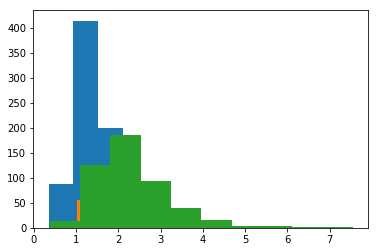

In [15]:
p = train.SalePrice/100000
plt.hist(p[pc_pred=='pc1'])
plt.hist(p[pc_pred=='pc2'])
plt.hist(p[pc_pred=='pc3'])

(array([  5.,  55.,  83.,  39.,   7.,   3.,   1.,   1.,   0.,   1.]),
 array([ 0.55 ,  1.033,  1.516,  1.999,  2.482,  2.965,  3.448,  3.931,
         4.414,  4.897,  5.38 ]),
 <a list of 10 Patch objects>)

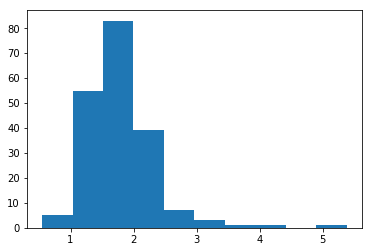

In [16]:
p = train.SalePrice/100000

plt.hist(p[pc_pred=='pc2'])


(array([  13.,  126.,  186.,   93.,   40.,   16.,    3.,    3.,    1.,    2.]),
 array([ 0.379 ,  1.0961,  1.8132,  2.5303,  3.2474,  3.9645,  4.6816,
         5.3987,  6.1158,  6.8329,  7.55  ]),
 <a list of 10 Patch objects>)

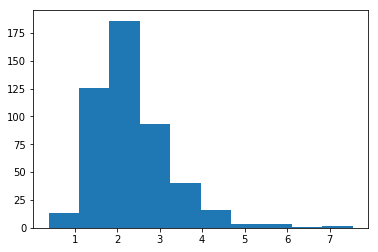

In [17]:
plt.hist(p[pc_pred=='pc3'])

מתמונה זאת אנחנו למדים שהחלוקה ל2 ו3 מתנהגת באופן כמעט זהה אל מול המחירים

In [18]:
price_category = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['pc'])
X_t = pd.get_dummies(all_data.loc[:, columns_for_pc], sparse=True)
pc_pred = svm.predict(X_t)
price_category[pc_pred=='pc2'] = 1
price_category[pc_pred=='pc3'] = 2
price_category = price_category.to_sparse()

In [19]:
# Monthes with the lagest number of deals may be significant
season = all_data.MoSold.replace( {1: 0, 
                                   2: 0, 
                                   3: 0, 
                                   4: 1,
                                   5: 1, 
                                   6: 1,
                                   7: 1,
                                   8: 0,
                                   9: 0,
                                  10: 0,
                                  11: 0,
                                  12: 0})
season.name = 'season'

# Numer month is not significant
all_data = all_data.replace({'MoSold': {1: 'Yan', 
                                        2: 'Feb', 
                                        3: 'Mar', 
                                        4: 'Apr',
                                        5: 'May', 
                                        6: 'Jun',
                                        7: 'Jul',
                                        8: 'Avg',
                                        9: 'Sep',
                                        10: 'Oct',
                                        11: 'Nov',
                                        12: 'Dec'}})

In [20]:
all_data = all_data.replace({'CentralAir': {'Y': 1, 
                                            'N': 0}})
all_data = all_data.replace({'PavedDrive': {'Y': 1, 
                                            'P': 0,
                                            'N': 0}})

In [21]:

reconstruct = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Reconstruct'])
reconstruct[all_data.YrSold < all_data.YearRemodAdd] = 1
reconstruct = reconstruct.to_sparse()

recon_after_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['ReconstructAfterBuy'])
recon_after_buy[all_data.YearRemodAdd >= all_data.YrSold] = 1
recon_after_buy = recon_after_buy.to_sparse()

build_eq_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Build.eq.Buy'])
build_eq_buy[all_data.YearBuilt >= all_data.YrSold] = 1
build_eq_buy = build_eq_buy.to_sparse()


In [22]:

# I hope this will help
all_data.YrSold = 2010 - all_data.YrSold


הורדת ערכים קיצונים

In [23]:

year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))
all_data.GarageYrBlt = all_data.GarageYrBlt.map(year_map)
all_data.loc[all_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 'NoGarage'


In [24]:

all_data.YearBuilt = all_data.YearBuilt.map(year_map)
all_data.YearRemodAdd = all_data.YearRemodAdd.map(year_map)


In [25]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

t = all_data[numeric_feats].quantile(.95)
#print(t)
use_max_scater = t[t == 0].index
use_95_scater = t[t != 0].index


In [26]:
print(t)
print(use_95_scater)
print(use_max_scater)


LotFrontage        109.70213
LotArea          17142.90000
Street               1.00000
Utilities            1.00000
OverallQual          8.00000
OverallCond          8.00000
MasVnrArea         466.00000
ExterQual            4.00000
ExterCond            4.00000
BsmtQual             5.00000
BsmtCond             3.00000
BsmtExposure         3.00000
BsmtFinSF1        1274.00000
BsmtFinSF2         432.30000
BsmtUnfSF         1474.60000
TotalBsmtSF       1776.10000
CentralAir           1.00000
1stFlrSF          1830.10000
2ndFlrSF          1131.20000
LowQualFinSF         0.00000
GrLivArea         2464.20000
BsmtFullBath         1.00000
BsmtHalfBath         1.00000
FullBath             2.00000
HalfBath             1.00000
BedroomAbvGr         4.00000
KitchenAbvGr         1.00000
KitchenQual          5.00000
TotRmsAbvGrd         9.00000
Functional           1.00000
Fireplaces           2.00000
FireplaceQu          4.00000
GarageCars           3.00000
GarageArea         856.10000
GarageQual    

In [27]:
# normalize data closer to 0 (divide by max value, so all value are at range [0,1])
all_data[use_max_scater] = all_data[use_max_scater]/all_data[use_max_scater].max()
# normalize data closer to 0 (divide by max value (of 95%), so all value are at range [0,1])
all_data[use_95_scater] = all_data[use_95_scater]/all_data[use_95_scater].quantile(.95)

In [28]:
# option 1 - Author's choice
t = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# option 2 - all numarical fetures
#t = all_data.dtypes[all_data.dtypes != "object"].index
print(t)


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [29]:
all_data.loc[:, t] = np.log1p(all_data.loc[:, t])

## Preparing for sklearn##

In [30]:
# all classes in sklearn requires numeric data only
# transform categorical variable into binary
X = pd.get_dummies(all_data, sparse=True)
X = X.fillna(0)

In [31]:
X = X.drop('RoofMatl_ClyTile', axis=1) # only one is not zero
X = X.drop('Condition2_PosN', axis=1) # only two is not zero
X = X.drop('MSZoning_C (all)', axis=1)
X = X.drop('MSSubClass_SubClass_160', axis=1)
# this features definitely couse overfitting

In [32]:
# add new features
X = pd.concat((X, newer_dwelling, season, reconstruct, recon_after_buy,
               qu_list, bad_heating, MasVnrType_Any, price_category, build_eq_buy), axis=1)

In [33]:
from itertools import product, chain

def poly(X):
    areas = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'BsmtUnfSF']
    # t = [s for s in X.axes[1].get_values() if s not in areas]
    t = chain(qu_list.axes[1].get_values(), 
              ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual', 'GarageCond',
               'KitchenQual', 'HeatingQC', 'bad_heating', 'MasVnrType_Any', 'SaleCondition_PriceDown', 'Reconstruct',
               'ReconstructAfterBuy', 'Build.eq.Buy'])
    for a, t in product(areas, t):
        x = X.loc[:, [a, t]].prod(1)
        x.name = a + '_' + t
        yield x

XP = pd.concat(poly(X), axis=1)
X = pd.concat((X, XP), axis=1)

In [34]:
X_train = X[:train.shape[0]]
X_test = X[train.shape[0]:]
#print(X_test)

In [35]:
# the model has become really big
X_train.shape
#print(X_train)

(1460, 466)

In [36]:
X_test.shape

(1459, 466)

In [37]:
y = np.log1p(train.SalePrice)

In [38]:
y.shape

(1460,)

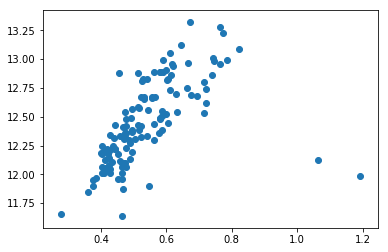

In [39]:

# this come from iterational model improvment. I was trying to understand why the model gives to the two points much better price
x_plot = X_train.loc[X_train['SaleCondition_Partial']==1, 'GrLivArea']
y_plot = y[X_train['SaleCondition_Partial']==1]
plt.scatter(x_plot, y_plot)


In [40]:

outliers_id = np.array([524, 1299])

outliers_id = outliers_id - 1 # id starts with 1, index starts with 0
X_train = X_train.drop(outliers_id)
y = y.drop(outliers_id)
# There are difinetly more outliers


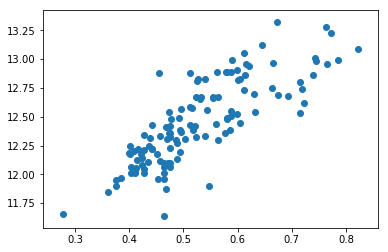

In [41]:
x_plot = X_train.loc[X_train['SaleCondition_Partial']==1, 'GrLivArea']
y_plot = y[X_train['SaleCondition_Partial']==1]
plt.scatter(x_plot, y_plot)


# Prediction Methods #

In [42]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

def rmsle(y, y_pred):
     return np.sqrt((( (np.log1p(y_pred*price_scale)- np.log1p(y*price_scale)) )**2).mean())

# scorer = make_scorer(rmsle, False)
scorer = make_scorer(mean_squared_error, False)

def rmse_cv(model, X, y):
     return (cross_val_score(model, X, y, scoring=scorer)).mean()

/home/barlesh/Anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
def r2_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, labels, scoring="r2_score", cv = 5))
    return(rmse)

# PCA & Linear Reggression #

## Train ##

In [44]:

from sklearn import datasets, linear_model

# Create linear regression object
#regr = linear_model.LinearRegression()


In [45]:
#regr.fit(X_train, y)

In [46]:
# The coefficients
#print('Coefficients: \n', regr.coef_)


In [47]:
#print("Mean squared error: %.2f"
#      % np.mean((regr.predict(X_train) - y) ** 2))


In [48]:
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(X_train, y))

## Predict ##

In [49]:
'''pred = abs(regr.predict(X_test))
print (pred)
print(max(pred))
print(min(pred))
'''

'pred = abs(regr.predict(X_test))\nprint (pred)\nprint(max(pred))\nprint(min(pred))\n'

In [50]:
'''

pred = np.expm1(pred) 
#pred = (regr.predict(X_test))
preds =pred
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv(data_path+result_path+"lreg_results.csv", index = False)
'''

'\n\npred = np.expm1(pred) \n#pred = (regr.predict(X_test))\npreds =pred\nsolution = pd.DataFrame({"id":test.Id, "SalePrice":preds})\nsolution.to_csv(data_path+result_path+"lreg_results.csv", index = False)\n'

# Lasso & Reggression #

## Train ##

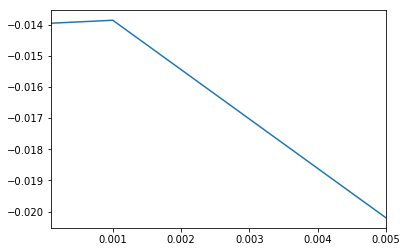

In [51]:
alphas = [1e-4, 1e-4, 1e-3, 5e-3]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=150000), X_train, y) for alpha in alphas]
pd.Series(cv_lasso, index = alphas).plot()

Choose alpha with better score

In [52]:
model_lasso = Lasso(alpha=5e-4, max_iter=1150000).fit(X_train, y)

number of fitcher that get zero is: 348
number of fitcher that get value: 118


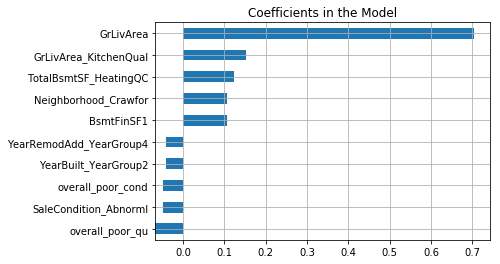

In [53]:
import matplotlib.pyplot as plt

coef = pd.Series(model_lasso.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(5), coef.tail(5)])
imp_coef.plot(kind = "barh",grid=1,)
plt.title("Coefficients in the Model")
number_of_value_fitchers = sum(coef[:]!=0)
num_of_zero = sum(coef[:]==0)
print("number of fitcher that get zero is:",num_of_zero)
print("number of fitcher that get value:",number_of_value_fitchers)


all the fitcher that get the higher values the=re are the most affective on the predict model : grliveArea,grliveArea+KitchenQual, totalBsmtSF+HeatingQC

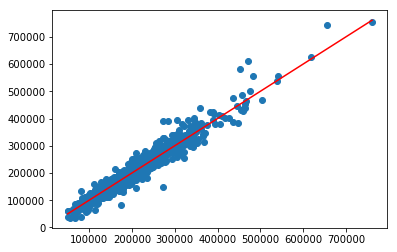

In [54]:
# This is a good way to see how model predict data
pred_train = np.expm1(model_lasso.predict(X_train))
plt.scatter(pred_train, np.expm1(y))
plt.plot([min(pred_train),max(pred_train)], [min(pred_train),max(pred_train)], c="red")

ניתן לראות כי החיזוי של מודל הלאסו חוזה באופן לינארי את מול המחיר בפועל 

Some point are far from the red line. May be they are outliers like the 524th and the 1299th

In [ ]:
# save to file to make a submission
p = np.expm1(model_lasso.predict(X_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":p}, columns=['id', 'SalePrice'])
solution.to_csv(data_path+result_path+"lasso_result.csv", index = False)

In [ ]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

cv_rmse_lasso = rmse_cv(model_lasso).mean()
print (cv_rmse_lasso)

# SVM #

## Train ##

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR

model_svm = svm.SVR( C=10,)
model_svm.fit(X_train, y)

cv_rmse_svm = rmse_cv(model_svm).mean()

In [ ]:
print (cv_rmse_svm)

In [ ]:

svm_preds = np.expm1(model_svm.predict(X_test))
preds =svm_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv(data_path+result_path+"svm_results.csv", index = False)


In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y)#predict(X
y_rbf_preds = np.expm1(y_rbf.predict(X_test))
#y_lin = svr_lin.fit(X_train, y).predict(X)
y_poly = svr_poly.fit(X_train, y)#.predict(X)
y_poly_preds = np.expm1(y_poly.predict(X_test))

In [ ]:
lw = 2
y =
plt.scatter(y[0:1458], X_train, color='darkorange', label='data')
plt.hold('on')
plt.plot(y, svr_rbf_preds[0:1458], color='navy', lw=lw, label='RBF model')
#plt.plot(X_, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(y, y_poly_preds[0:1458], color='cornflowerblue', lw=lw, )#label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### 1.1. 

## Predict ##

[back to top](#top)]

כאן נשאר להדביק את מה שרשמנו מהמסמך וורד!!!!!!!!!!!!!!!!!

### 1.2. 

[[back to top](#top)]

<a id='2.'></a>

[[back to top](#top)]

<a id='2.'></a>

<a id='2.1.'></a>

### 2.1. 

[[back to top](#top)]

### 2.2. 

[[back to top](#top)]

<a id='Appendix'></a>

## Appendix

[[back to top](#top)]

- Great tutorials: 
 - 1) 
 - 2) 
- Refferences: 
 - 1) 
- Resources: 
 - 
 - 

[[back to top](#top)]